In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (FuncFormatter, MultipleLocator)
import math

In [2]:
 na_values = ["", 
             "#N/A", 
             "#N/A N/A", 
             "#NA", 
             "-1.#IND", 
             "-1.#QNAN", 
             "-NaN", 
             "-nan", 
             "1.#IND", 
             "1.#QNAN", 
             "<NA>", 
             "N/A", 
#              "NA", 
             "NULL", 
             "NaN", 
             "n/a", 
             "nan", 
             "null"]


In [3]:
dpi = 100

In [4]:
df = pd.read_csv('../datasets/train_clean_v1.csv', index_col=0, na_values=na_values,keep_default_na=False,
                dtype={'MS SubClass' : str, 'Overall Qual' : str, 'Overall Cond' : str, 'Bsmt Full Bath' : str,
                        'Bsmt Half Bath' : str, 'Full Bath' : str, 'Half Bath' : str, 'Bedroom AbvGr' : str, 'Kitchen AbvGr' : str,
                        'TotRms AbvGrd' : str, 'Fireplaces' : str, 'Garage Cars' : str})

In [5]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   object 
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
dict_categories = {'continuous' : ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                                   'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
                                   'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
                                   'Misc Val', 'SalePrice'],
                  'discrete' : ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 
                                'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
                                'Mo Sold', 'Yr Sold'],
                  'nominal' : ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 
                               'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
                               'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
                               'Garage Type', 'Misc Feature', 'Sale Type'],
                  'ordinal' : ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 
                               'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                               'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 
                               'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']}

In [8]:
df_continuous = df[dict_categories['continuous']]
df_continuous.columns

Index(['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

### Pairplot for Continuous Variables - Investigating Distributions and Correlations
* Since there are over 20 numeric columns, plots are generated in sets to better visualize and analyze them
* Each set consists of a scatter-plot in the lower diagonal, histogram on the diagonal and correlation heat map in the upper diagonal
* Sale Price feature is common in all sets and its the last column-top row in the matrix

In [9]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

def format_axes(g):
    for ax in g.axes.flat:
        ax.grid(False)
        g.fig.patch.set_facecolor('#00283b')
        ax.set_facecolor('#00283b')
        ax.tick_params(axis='both', which='both', labelsize=10, labelcolor = 'ghostwhite', color='ghostwhite')
        ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

        ax.xaxis.get_label().set_fontname('Cambria')
        ax.xaxis.get_label().set_fontsize(10)
        ax.xaxis.get_label().set_color('ghostwhite')
        ax.yaxis.get_label().set_fontname('Cambria')
        ax.yaxis.get_label().set_fontsize(10)
        ax.yaxis.get_label().set_color('ghostwhite')

        ax.spines['bottom'].set_color('ghostwhite')
        ax.spines['top'].set_color('ghostwhite') 
        ax.spines['right'].set_color('ghostwhite')
        ax.spines['left'].set_color('ghostwhite')

        ax.set_title(ax.get_title(), fontsize=12, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')
# Source: Adapted from https://stackoverflow.com/questions/66108908/how-to-combine-a-pairplot-and-a-triangular-heatmap
def pairgrid(df, set_num):
    g = sns.PairGrid(df, diag_sharey=False, despine=True)

    g.map_upper(hide_current_axis)
    g.map_lower(sns.scatterplot, color='#8c2d38')
    g.map_diag(sns.histplot, color='ghostwhite')
    (xmin, _), (_, ymax) = g.axes[0, 0].get_position().get_points()
    (_, ymin), (xmax, _) = g.axes[-1, -1].get_position().get_points()

    ax = g.fig.add_axes([xmin, ymin, xmax - xmin, ymax - ymin], facecolor='none')

    corr1 = df.corr()
    mask1 = np.tril(np.ones_like(corr1, dtype=bool))
    sns.heatmap(corr1, mask=mask1, cmap='RdBu', vmax=0.5, vmin=-0.5,
                linewidths=.5, linecolor='#00283b', cbar=False, 
                annot=True, annot_kws={'size': 22}, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    format_axes(g)
    plt.subplots_adjust(hspace=0, wspace=0)
    g.savefig('../imgs/Pairplot_Scatter_HeatMap_Set' + str(set_num) +'.png', bbox_inches='tight', dpi=dpi)


findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


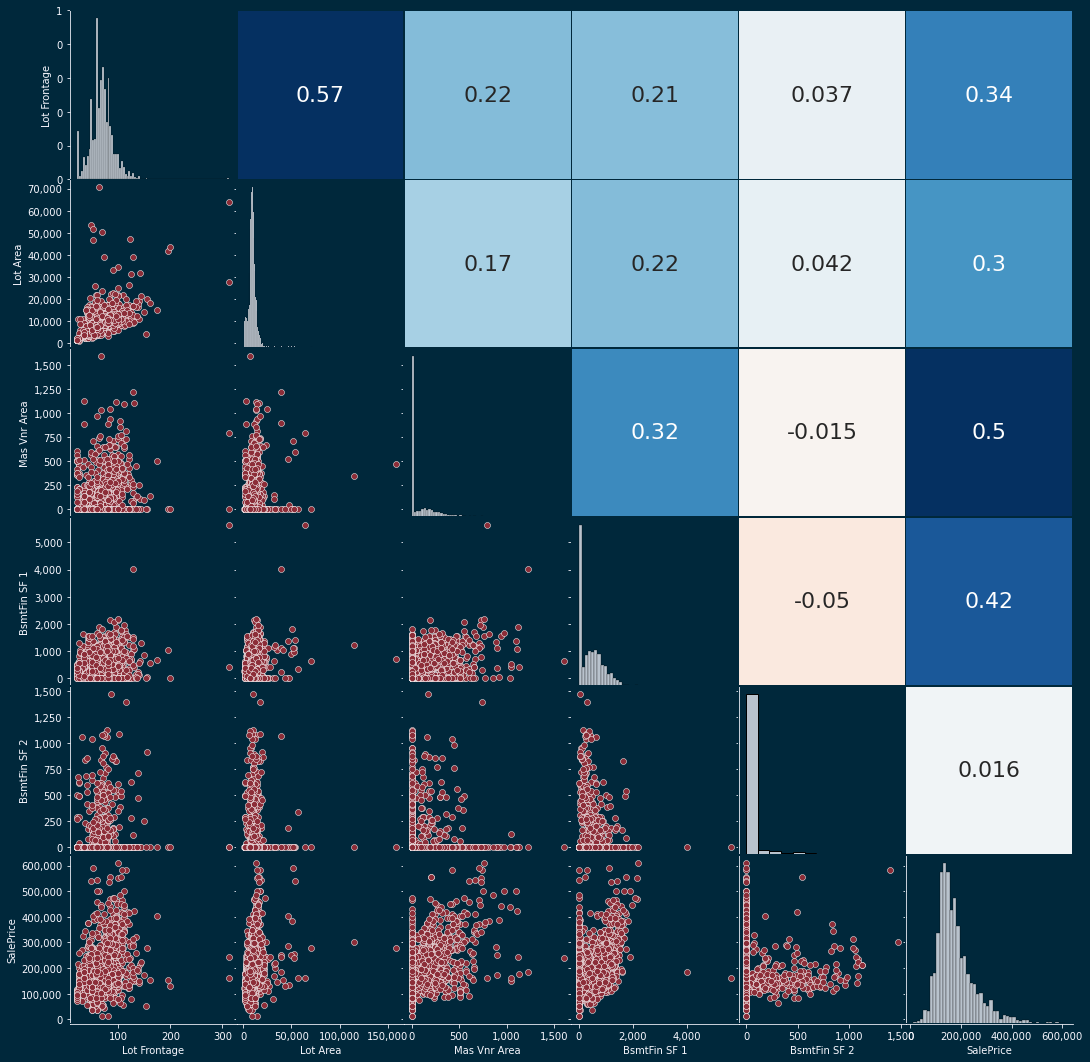

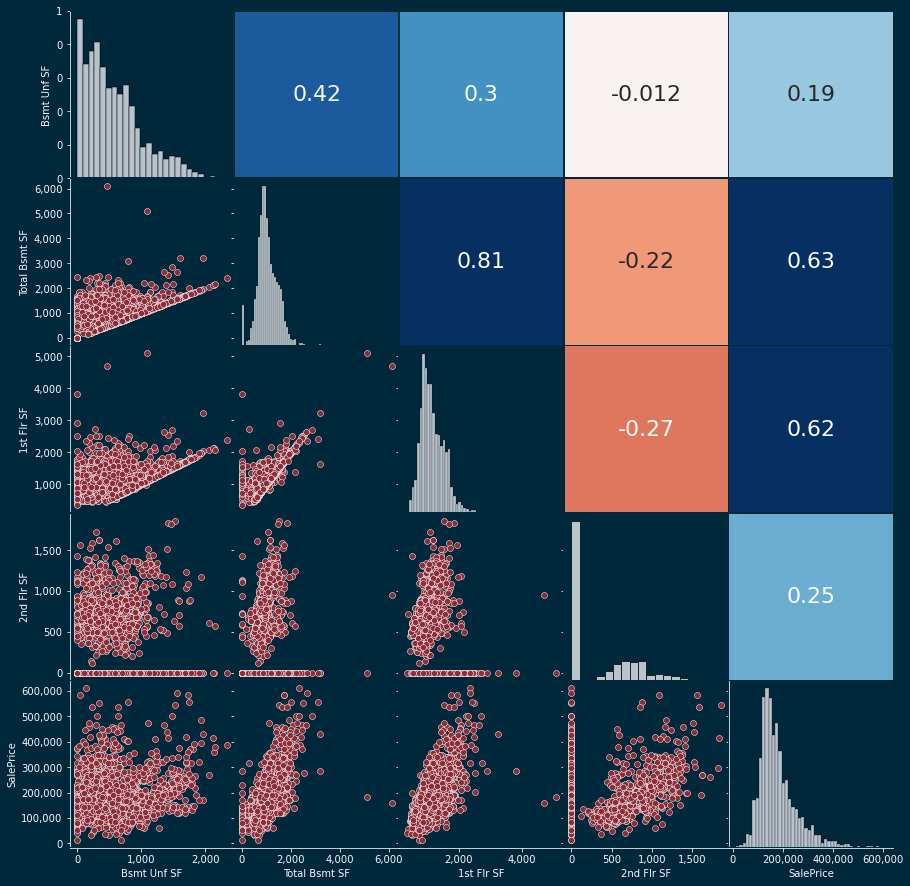

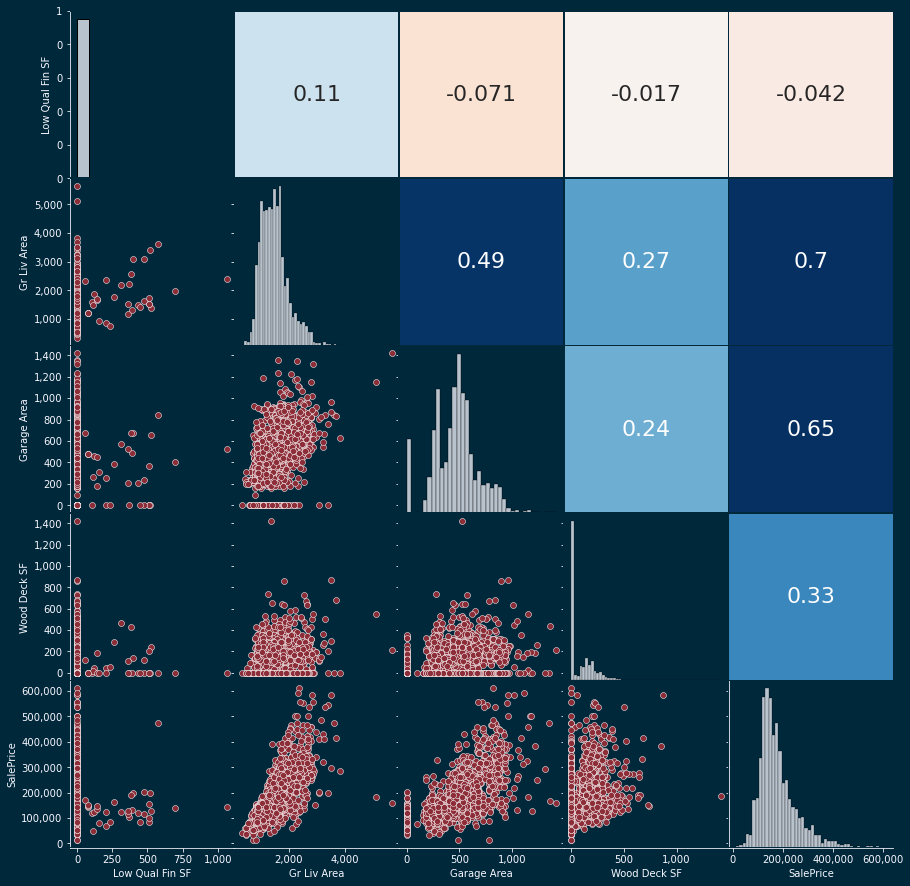

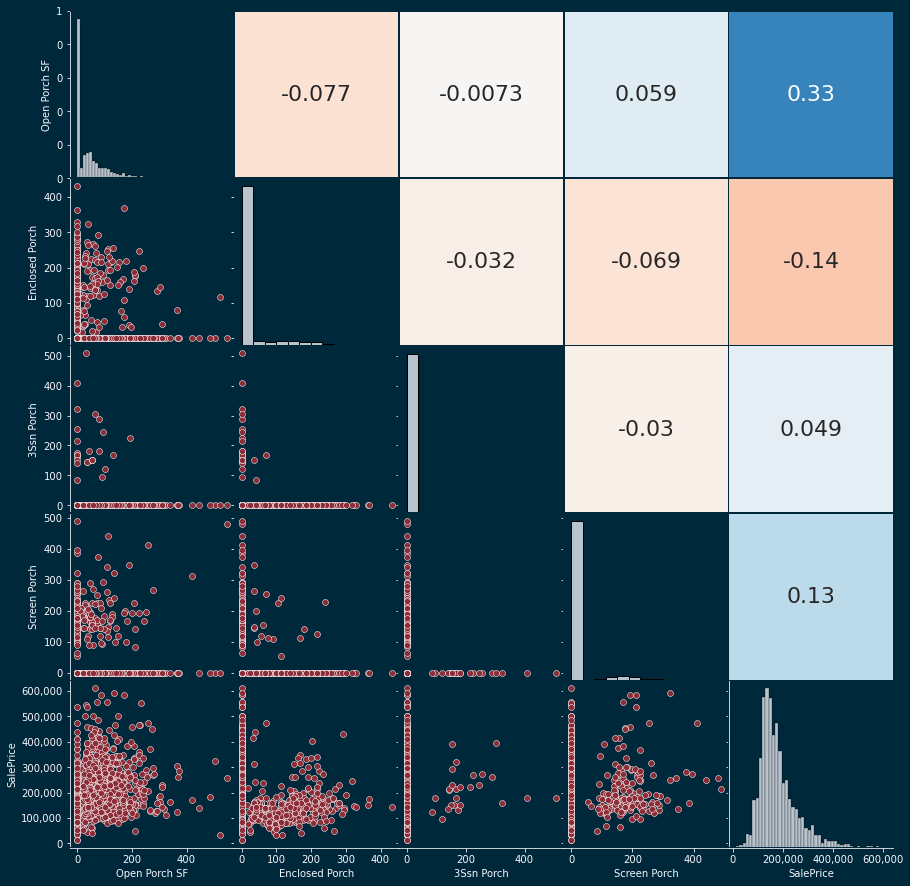

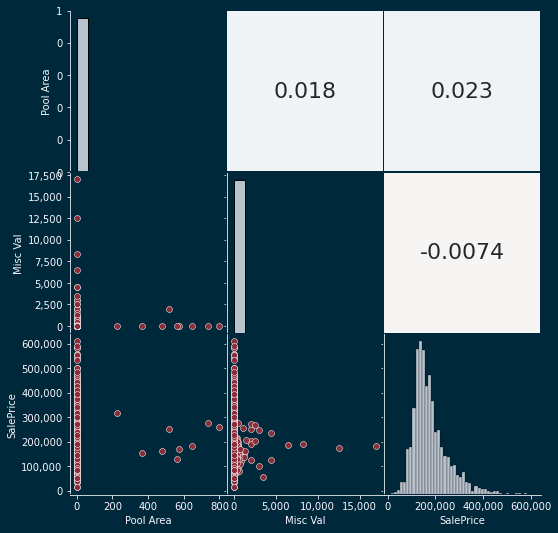

In [10]:
ls_df = []
set_num = 1
for i in range(0,len(dict_categories['continuous'])):
    ls_df.append(df[dict_categories['continuous'][i]])
    if i % 4 == 0 and i>2:
        ls_df.append(df[dict_categories['continuous'][-1:]])
        df_plot = pd.concat(ls_df, axis=1)
        ls_df =[]
        pairgrid(df_plot, set_num)
        set_num += 1
        df_plot = []

df_plot = pd.concat(ls_df, axis=1)
ls_df =[]
pairgrid(df_plot, set_num)
df_plot = []

### Investigating the Correlation Matrix between SalePrice and Continuous Numeric Variables
* 2 correlation heatmaps are generated
    1. Default correlation heatmap
    2. Dropping the zeroes rows from a respective feature column and then calculating the correlation

In [11]:
def calc_corr_nonzero(df):
    df = df.loc[df.iloc[:,0]!= 0]
    nonzero_corr = df.corr().iloc[1,0]
    return nonzero_corr
dict_corr = dict()
for col in list(df_continuous.columns)[:-1]:
    mask = [col, df_continuous.columns[-1]]
    corr = calc_corr_nonzero(df[mask])
    dict_corr[col] = corr
df_nonzero_corr = pd.DataFrame.from_dict(dict_corr, columns=['SalePrice'], orient='index' )
df_nonzero_corr

,SalePrice
Lot Frontage,0.341842
Lot Area,0.296566
Mas Vnr Area,0.427216
BsmtFin SF 1,0.488932
BsmtFin SF 2,0.293420
Bsmt Unf SF,0.153235
Total Bsmt SF,0.627208
1st Flr SF,0.618486
2nd Flr SF,0.657843
Low Qual Fin SF,0.235137


findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


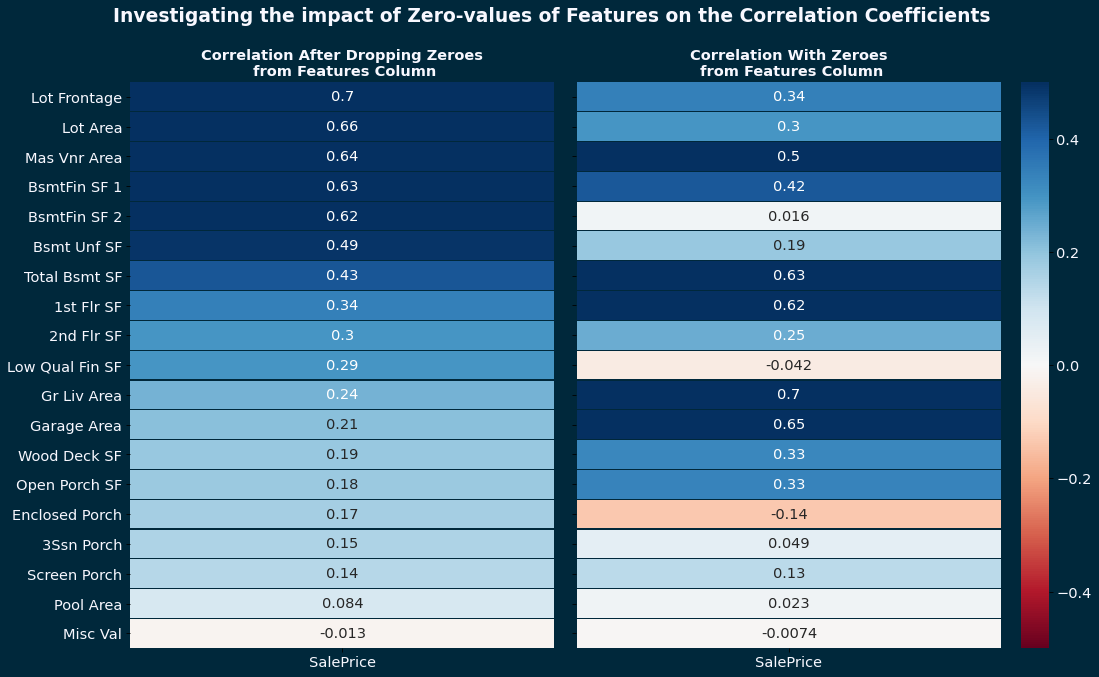

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, sharey=True, figsize = (15,10), facecolor='#00283b', dpi=75)
plt.subplots_adjust(wspace=0.05)
fig.suptitle('Investigating the impact of Zero-values of Features on the Correlation Coefficients',
             fontsize=18, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')
sns.heatmap(data=df_nonzero_corr.sort_values(by='SalePrice', ascending=False),
           cmap='RdBu', vmax=0.5, vmin=-0.5,
                linewidths=.05, linecolor='#00283b', cbar=False, 
                annot=True, annot_kws={'size': 14}, ax=ax1)
ax1.set_title('Correlation After Dropping Zeroes\n from Features Column')
ax1.set_title(ax1.get_title(), fontsize=14, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')
ax1.set_facecolor('#00283b')

ax1.tick_params(axis='both', labelsize=14, labelcolor='ghostwhite')
sns.heatmap(data=df.corr().loc[df_nonzero_corr.index.tolist()][['SalePrice']] ,
           cmap='RdBu', vmax=0.5, vmin=-0.5,
                linewidths=.05, linecolor='#00283b', cbar=True, 
                annot=True, annot_kws={'size': 14}, ax=ax2)
ax2.set_title('Correlation With Zeroes\n from Features Column')
ax2.set_title(ax2.get_title(), fontsize=14, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')
ax2.set_facecolor('#00283b')
ax2.tick_params(axis='both', labelsize=14, labelcolor='ghostwhite')
cbar_axes = ax2.figure.axes[-1]
cbar_axes.tick_params(axis='both', labelsize=14, labelcolor='ghostwhite')

#manipulating the width of ax2 to make it equal to ax1
_, _, w, _ = ax1.get_position().bounds
l, b, _, h = ax2.get_position().bounds
ax2.set_position([l,b, w,h])

#manipulating the position of cbar
l, b, _, _ = ax2.get_position().bounds
_,_,w,h = cbar_axes.get_position().bounds
cbar_axes.set_position([l+w+0.37,b, w,h])

fig.savefig('../imgs/Correlation_Matrix_SalePrice_Continuous_Categories.png', bbox_inches='tight', dpi=dpi)



In [13]:
# to not format twinx-countplot-as 200k
# source: https://stackoverflow.com/questions/49195606/find-all-shared-x-axes-in-matplotlib-and-turn-off-the-grid-on-siblings
def format_fig(fig, flag='NotTimeSeries'):
    fig.suptitle(fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                 fontfamily = 'Cambria', color = 'ghostwhite')
    fig.set_facecolor('#00283b')
    
    #loop through all the axes in the figure
    for ax in fig.axes:
        #ax = ax.get_shared_x_axes().get_siblings(ax)[1] #primary axis location
        ax.grid(False)
        ax.set_facecolor('#00283b')
        ax.tick_params(axis='both', which='both', labelsize=12, labelcolor = 'ghostwhite', color='ghostwhite')
        if flag == 'NotTimeSeries':
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag == 'TimeSeries':
            axPrimary = ax.get_shared_x_axes().get_siblings(ax)[1]
            axPrimary.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        else:
            pass

        ax.xaxis.get_label().set_fontname('Cambria')
        ax.xaxis.get_label().set_fontsize(10)
        ax.xaxis.get_label().set_color('ghostwhite')
        ax.yaxis.get_label().set_fontname('Cambria')
        ax.yaxis.get_label().set_fontsize(10)
        ax.yaxis.get_label().set_color('ghostwhite')

        ax.spines['bottom'].set_color('ghostwhite')
        ax.spines['top'].set_color('ghostwhite') 
        ax.spines['right'].set_color('ghostwhite')
        ax.spines['left'].set_color('ghostwhite')

        ax.set_title(ax.get_title(), fontsize=14, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')

In [14]:
def boxplot(ax, df):
    # Determine the order of boxes
    xname = df.iloc[:,1].name
    yname = df.iloc[:,0].name
    order = df.groupby(yname)[xname].median().sort_values(ascending=False).index.tolist()
    sns.boxplot(data=df, x=df.iloc[:,1], y=df.iloc[:,0], ax=ax, dodge=False, order=order, color='ghostwhite')
    #sns.swarmplot(data=df, x=df.iloc[:,1], y=df.iloc[:,0], ax=ax, dodge=False, order=order, size=2)
    label_pos = ax.get_yticks()
    labels = [item.get_text() for item in ax.get_yticklabels()]
    lines = ax.get_lines()
    ax.set_title(df.iloc[:,0].name)
    ax.yaxis.get_label().set_visible(False)


In [15]:
def pointplot(ax, df):
    # Determine the order of boxes
    xname = df.iloc[:,1].name
    yname = df.iloc[:,0].name
    order = df.groupby(yname)[xname].median().sort_values(ascending=False).index.tolist()
    sns.pointplot(data=df, x=df.iloc[:,1], y=df.iloc[:,0], ax=ax, dodge=False, order=order, 
                  estimator = np.median, color='ghostwhite', capsize=.2)
    label_pos = ax.get_yticks()
    labels = [item.get_text() for item in ax.get_yticklabels()]
    lines = ax.get_lines()
    ax.set_title(df.iloc[:,0].name)
    ax.yaxis.get_label().set_visible(False)

### Investigating the Relationship Between Nominal Variables
* Plotting Boxplots for each category to see if there is relationship to sale price

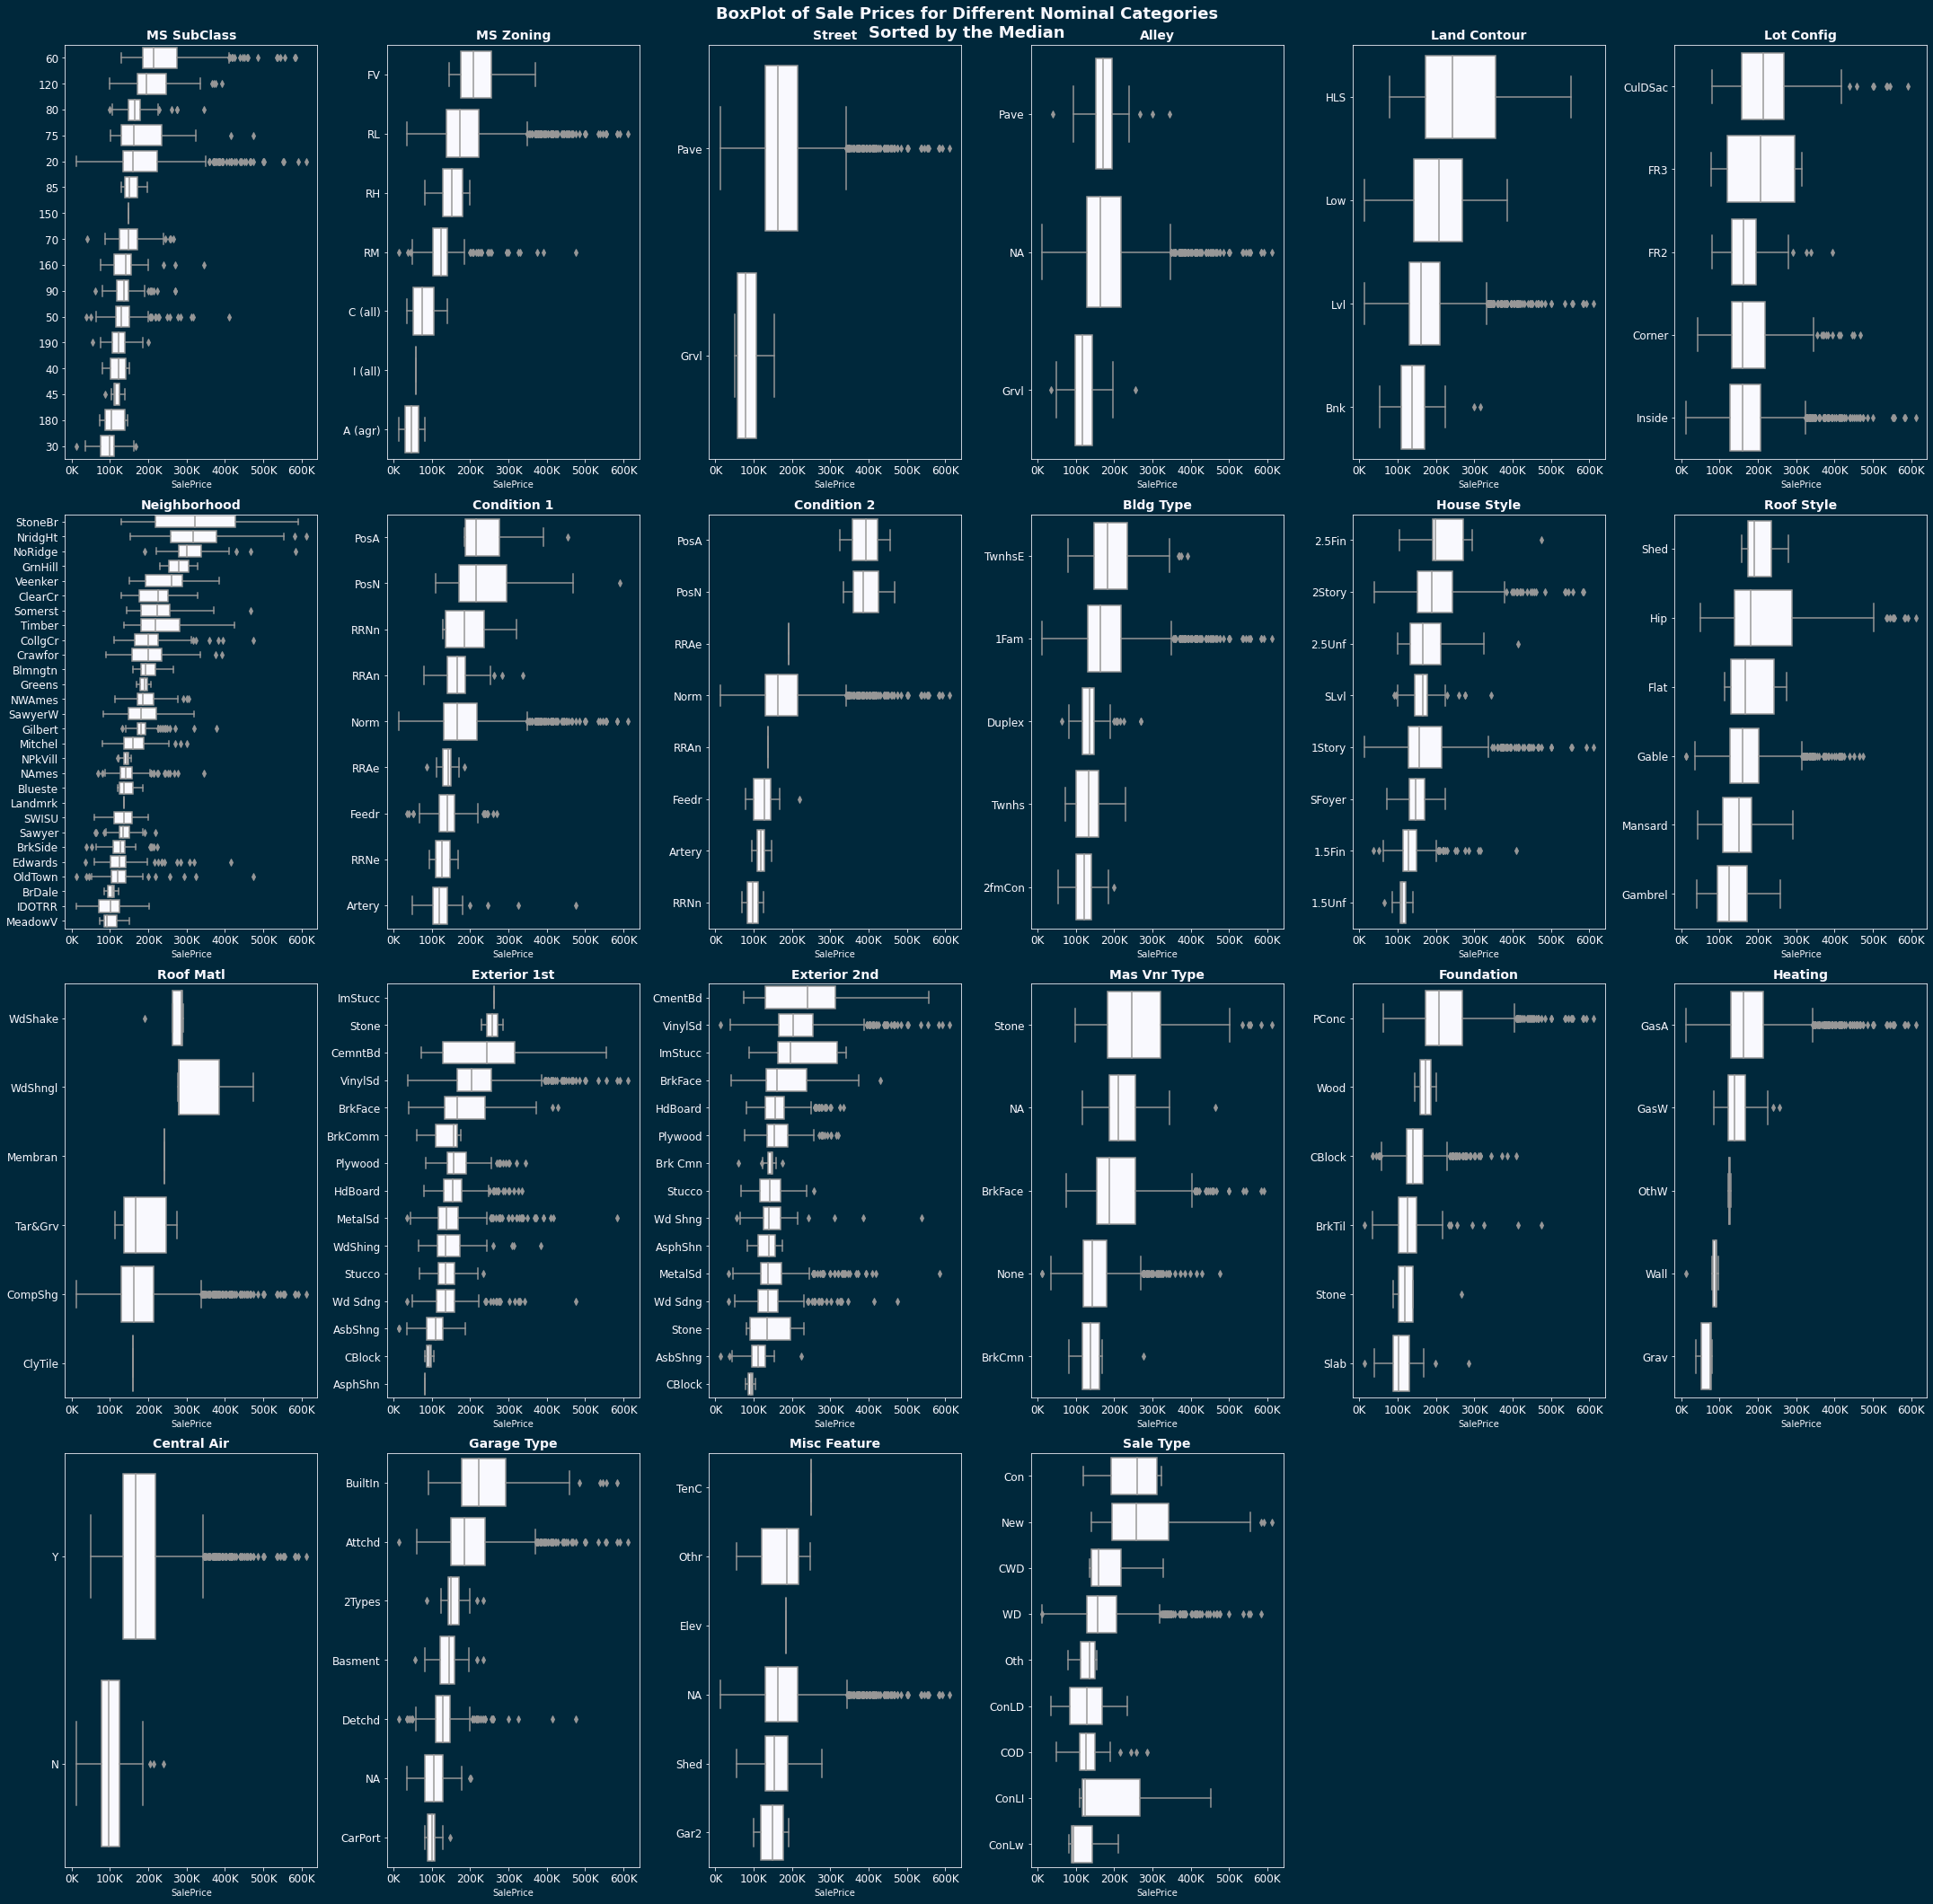

In [16]:
### Code to generate boxplot
#determining the grid size
len_df_nominal = len(df[dict_categories['nominal']].columns)
ncols = 6
nrows = math.ceil(len_df_nominal/ncols)
#len_df_numeric, nrows, ncols

fig=plt.figure(figsize=(30,30), constrained_layout=False)
fig.suptitle('BoxPlot of Sale Prices for Different Nominal Categories\nSorted by the Median')
ls_df = []
set_num = 1
for i in range(0,len(dict_categories['nominal'])):
    ax=fig.add_subplot(nrows,ncols,i+1)
    ls_df.append(df[dict_categories['nominal'][i]])
    ls_df.append(df[dict_categories['continuous'][-1:]])
    df_plot = pd.concat(ls_df, axis=1)
    boxplot(ax, df_plot)
    ls_df =[]
    set_num += 1
    df_plot = []
format_fig(fig)
#fig.set_constrained_layout(True)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
fig.savefig('../imgs/BoxPlot_of_SalePrices_for_Different_Nominal_Categories.png', bbox_inches='tight', dpi=dpi)

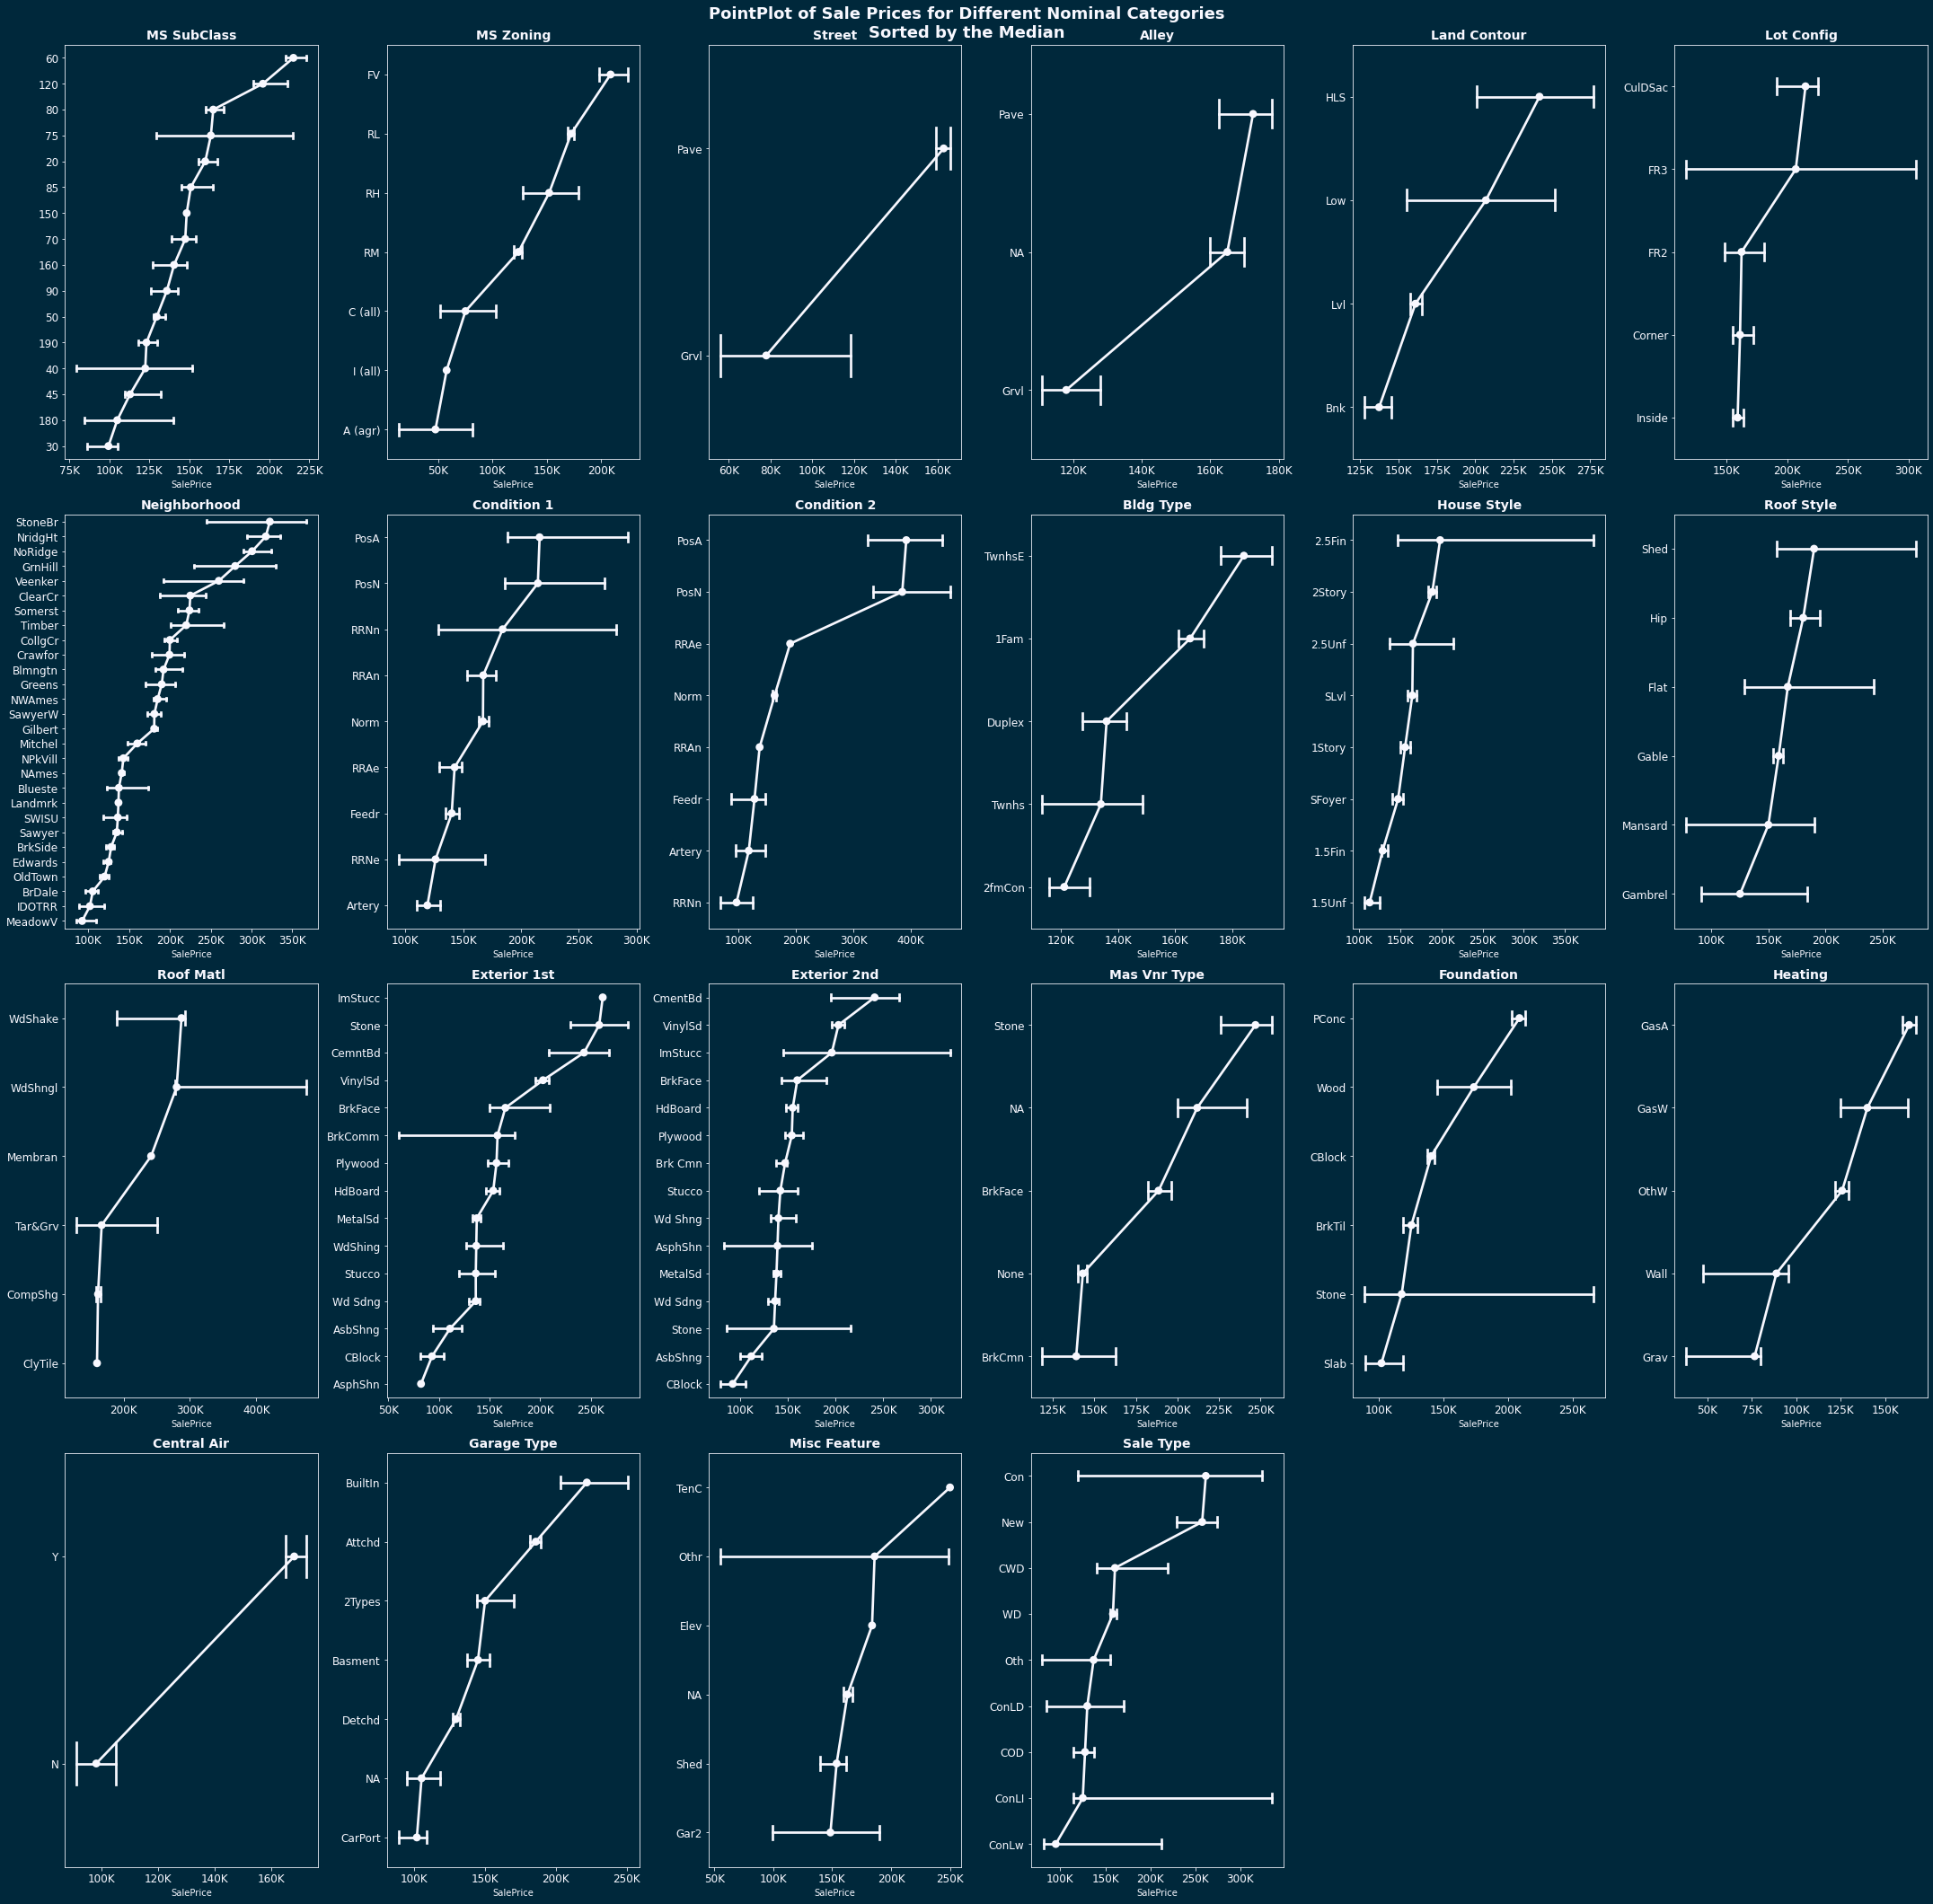

In [17]:
### Code to generate pointplot
#determining the grid size
len_df_nomimal = len(df[dict_categories['nominal']].columns)
ncols = 6
nrows = math.ceil(len_df_nomimal/ncols)
#len_df_numeric, nrows, ncols

fig=plt.figure(figsize=(30,30), constrained_layout=False)
fig.suptitle('PointPlot of Sale Prices for Different Nominal Categories\nSorted by the Median')
ls_df = []
set_num = 1
for i in range(0,len(dict_categories['nominal'])):
    ax=fig.add_subplot(nrows,ncols,i+1)
    ls_df.append(df[dict_categories['nominal'][i]])
    ls_df.append(df[dict_categories['continuous'][-1:]])
    df_plot = pd.concat(ls_df, axis=1)
    pointplot(ax, df_plot)
    ls_df =[]
    set_num += 1
    df_plot = []
format_fig(fig)
#fig.set_constrained_layout(True)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
fig.savefig('../imgs/PointPlot_of_SalePrices_for_Different_Nominal_Categories.png', bbox_inches='tight', dpi=dpi)

### Investigating the Relationship Between SalePrice and Ordinal Variables

In [18]:
df[dict_categories['ordinal'][0]].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

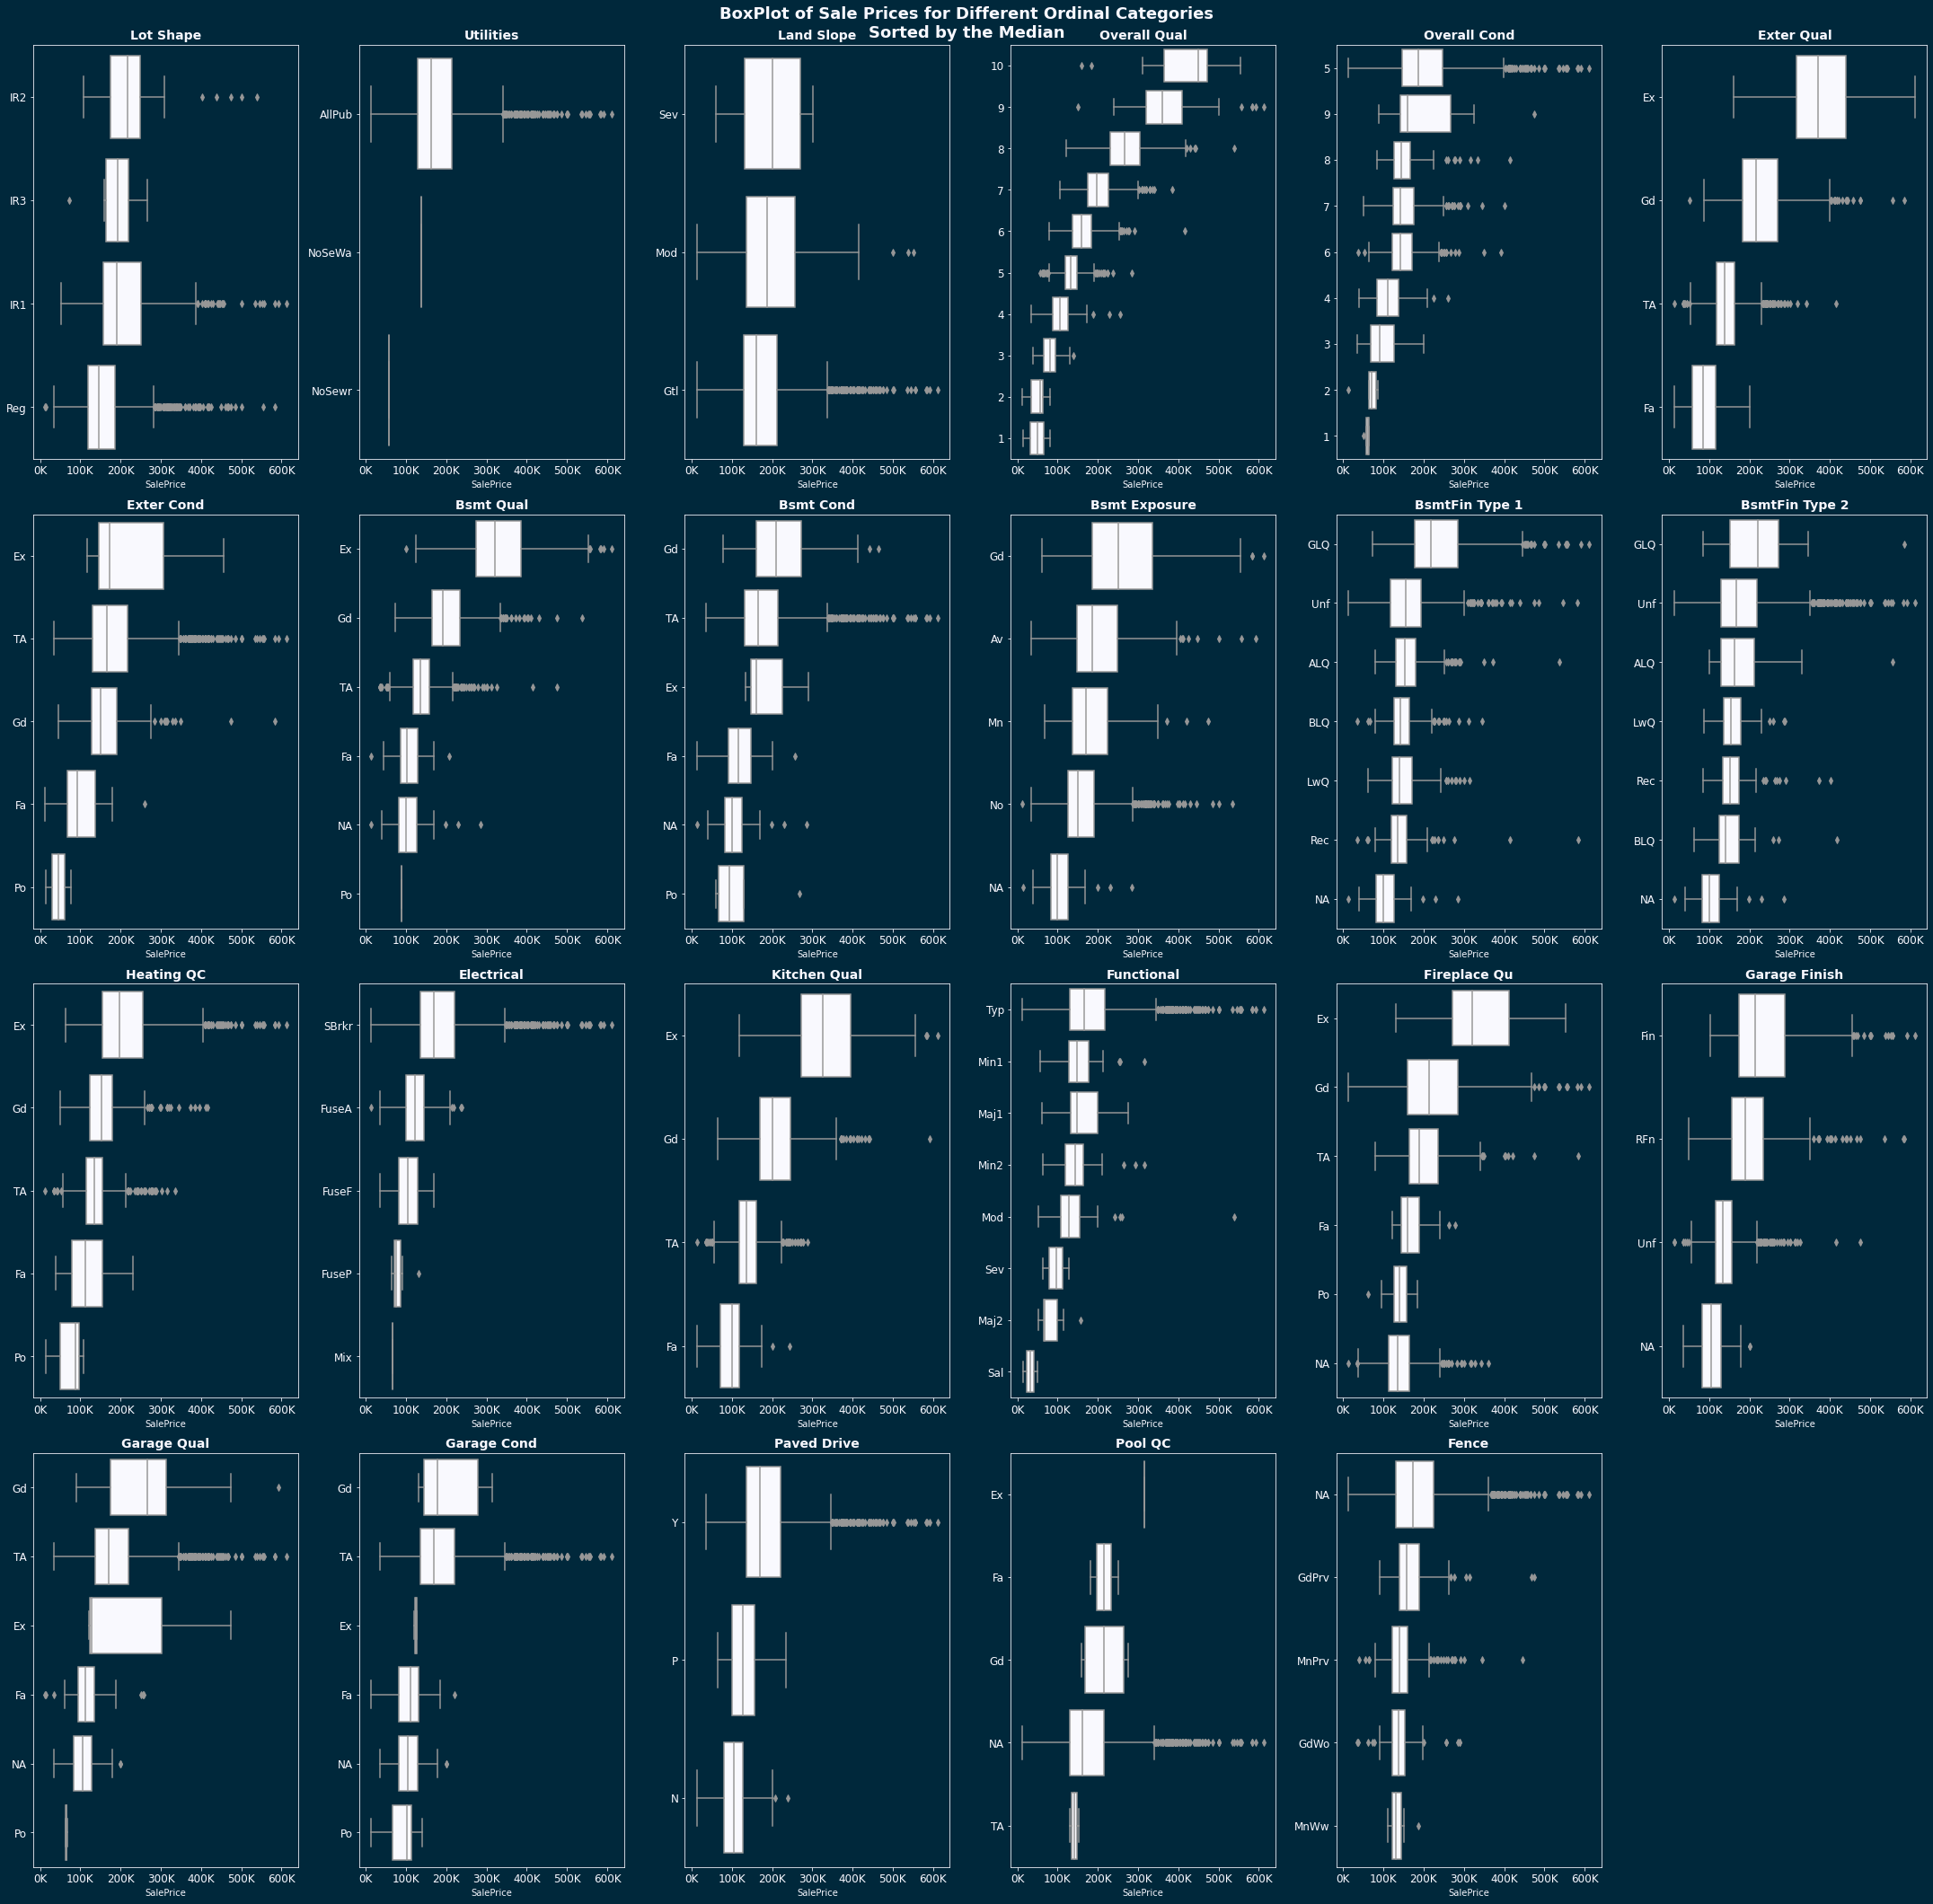

In [19]:
### Code to generate boxplot
#determining the grid size
len_df_ordinal = len(df[dict_categories['ordinal']].columns)
ncols = 6
nrows = math.ceil(len_df_ordinal/ncols)
#len_df_numeric, nrows, ncols

fig=plt.figure(figsize=(30,30), constrained_layout=False)
fig.suptitle('BoxPlot of Sale Prices for Different Ordinal Categories\nSorted by the Median')
ls_df = []
set_num = 1
for i in range(0,len(dict_categories['ordinal'])):
    ax=fig.add_subplot(nrows,ncols,i+1)
    ls_df.append(df[dict_categories['ordinal'][i]])
    ls_df.append(df[dict_categories['continuous'][-1:]])
    df_plot = pd.concat(ls_df, axis=1)
    boxplot(ax, df_plot)
    ls_df =[]
    set_num += 1
    df_plot = []
format_fig(fig)
#fig.set_constrained_layout(True)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
fig.savefig('../imgs/BoxPlot_of_SalePrices_for_Different_Ordinal_Categories.png', bbox_inches='tight', dpi=dpi)

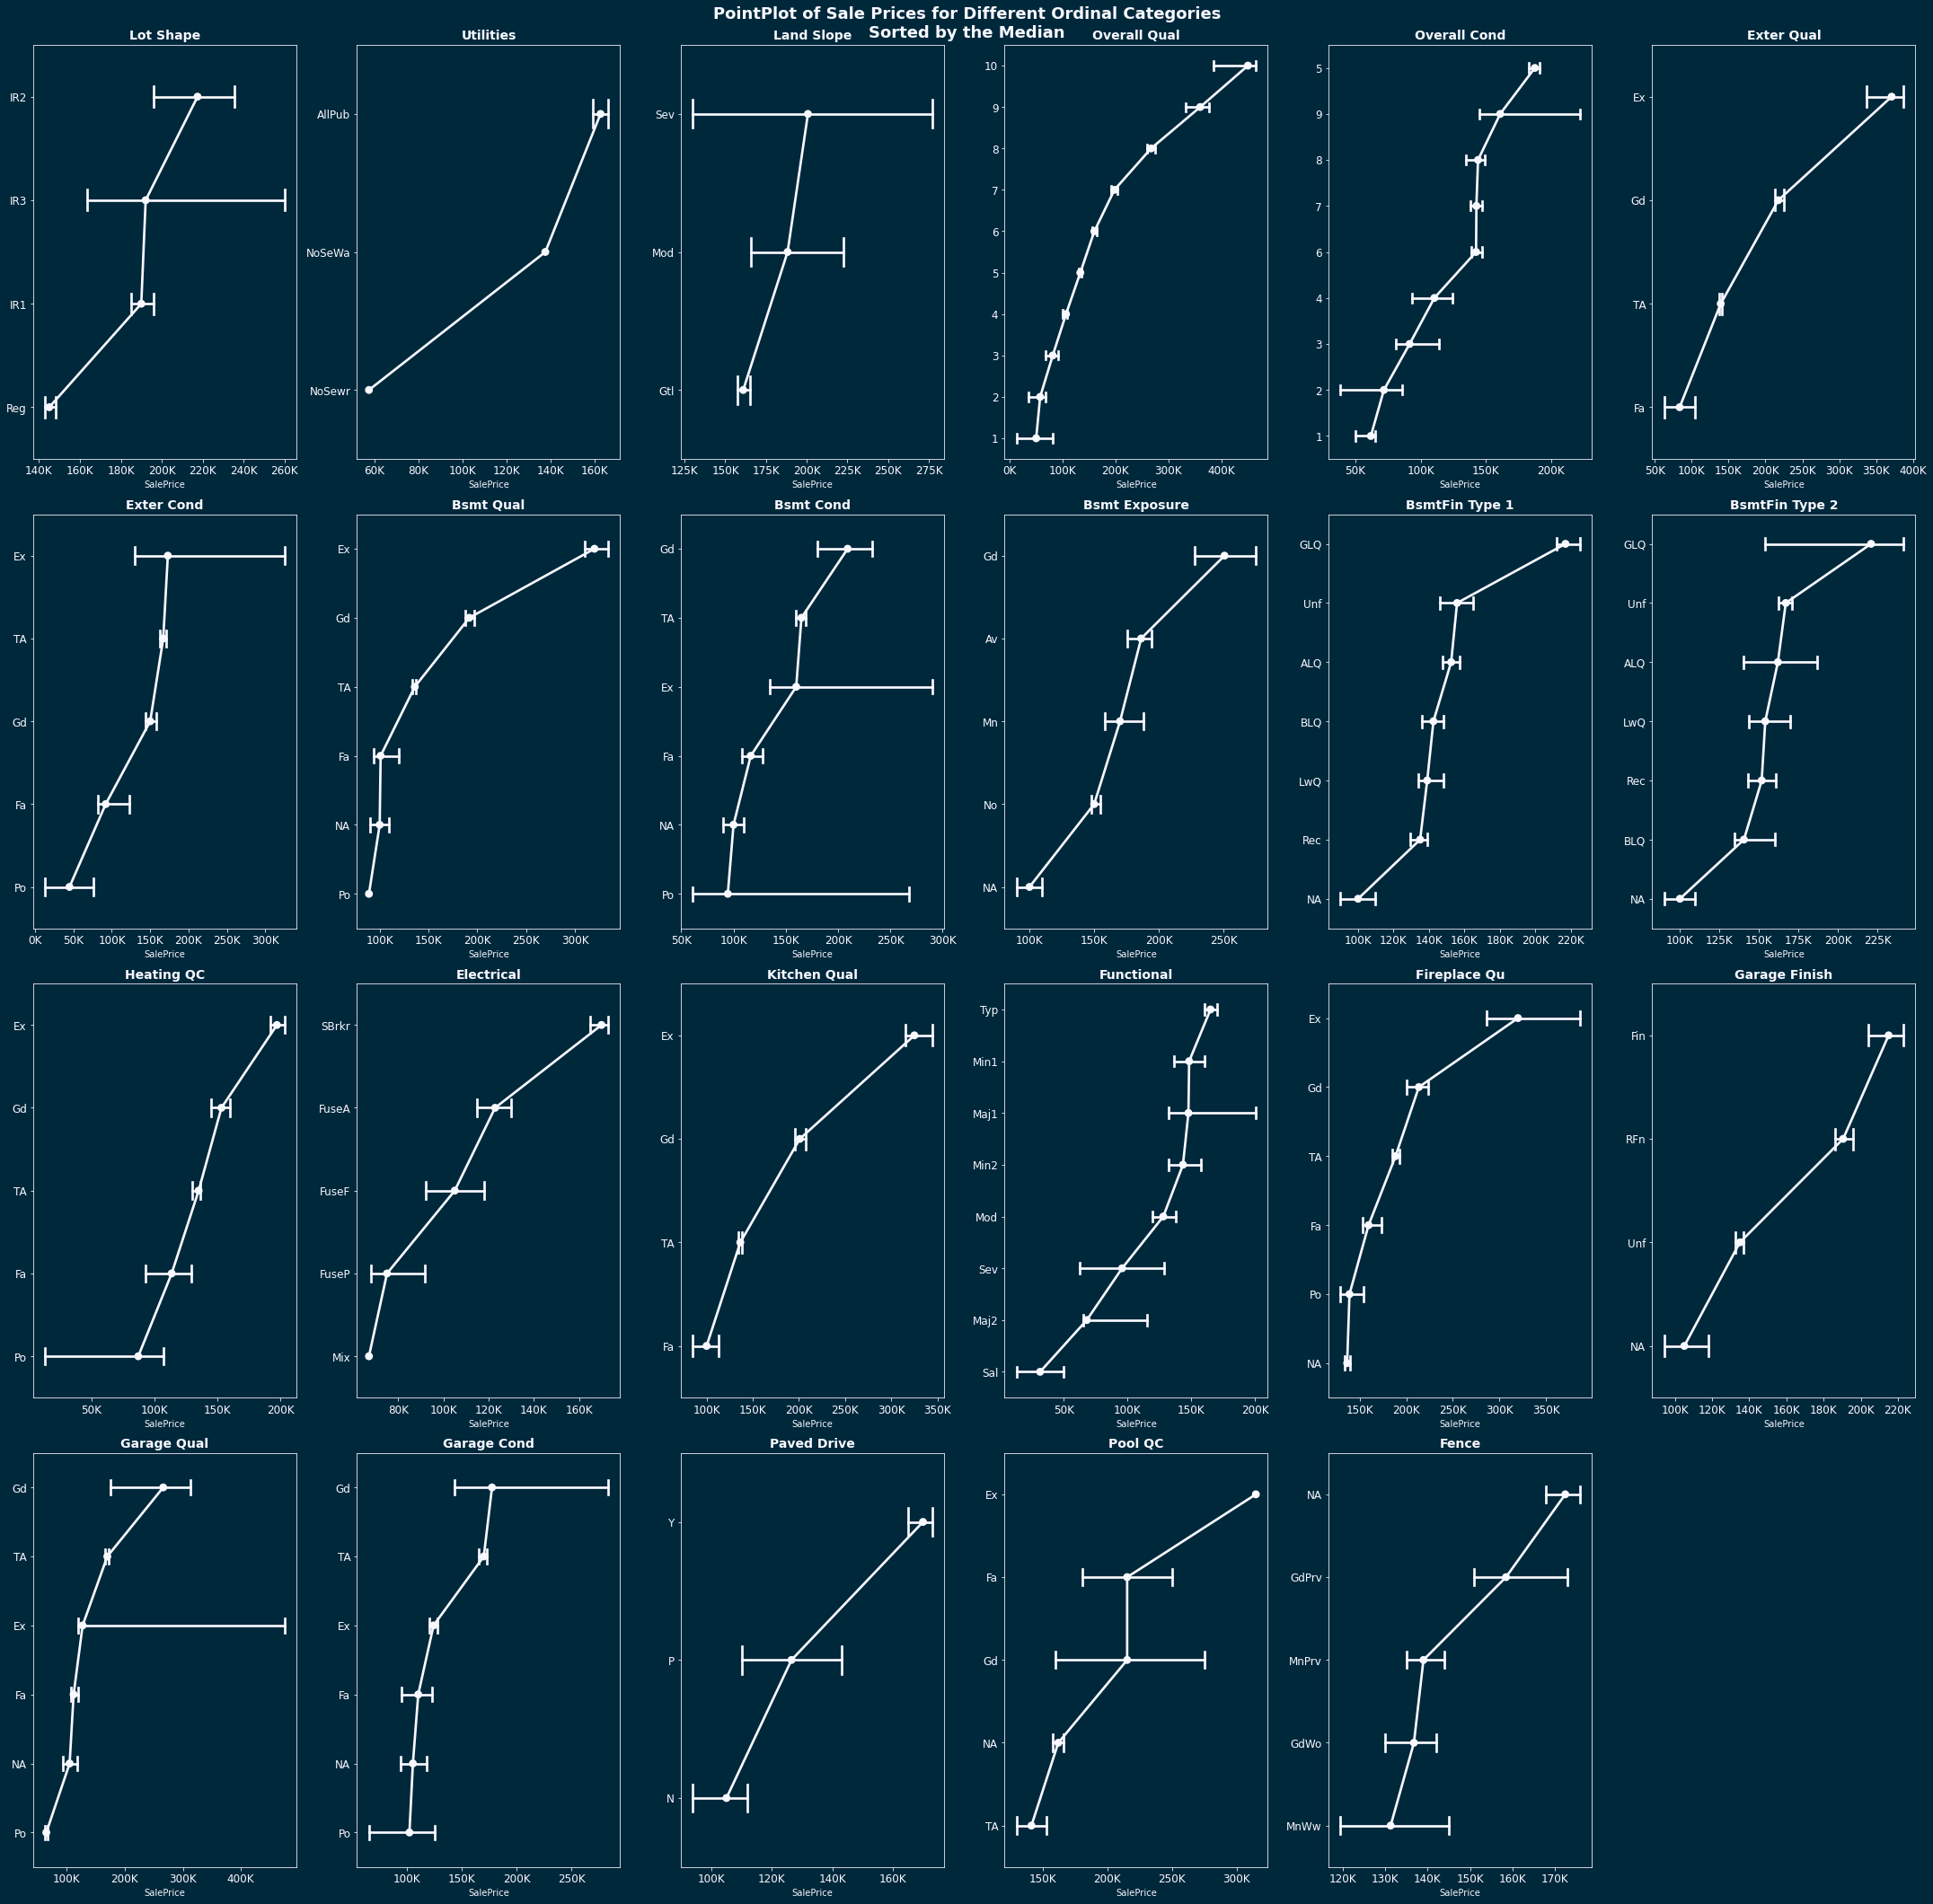

In [20]:
### Code to generate pointplot
#determining the grid size
len_df_ordinal = len(df[dict_categories['ordinal']].columns)
ncols = 6
nrows = math.ceil(len_df_ordinal/ncols)
#len_df_numeric, nrows, ncols

fig=plt.figure(figsize=(30,30), constrained_layout=False)
fig.suptitle('PointPlot of Sale Prices for Different Ordinal Categories\nSorted by the Median')
ls_df = []
set_num = 1
for i in range(0,len(dict_categories['ordinal'])):
    ax=fig.add_subplot(nrows,ncols,i+1)
    ls_df.append(df[dict_categories['ordinal'][i]])
    ls_df.append(df[dict_categories['continuous'][-1:]])
    df_plot = pd.concat(ls_df, axis=1)
    pointplot(ax, df_plot)
    ls_df =[]
    set_num += 1
    df_plot = []
format_fig(fig)
#fig.set_constrained_layout(True)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
fig.savefig('../imgs/PointPlot_of_SalePrices_for_Different_Ordinal_Categories.png', bbox_inches='tight', dpi=dpi)

In [21]:
dict_ordinal_encode = {
                        'Lot Shape' : {'Reg':4, 'IR1':3, 'IR3':2, 'IR4':1},
                        'Utilities' : {'AllPub':3, 'NoSeWa':2, 'NoSeWr':1},
                        'Land Slope': {'Sev' : 3, 'Mod' :2, 'Gtl' :1},
                        'Overall Qual' : {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},
                        'Overall Cond' : {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},
                        'Exter Qual' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Exter Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Bsmt Qual' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Bsmt Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0},
                        'BsmtFin Type 1' : {'GLQ' : 6, 'Unf' : 5, 'ALQ' : 4, 'BLQ' : 3, 'LwQ' : 2, 'Rec' : 1, 'NA' : 0},
                        'BsmtFin Type 2' : {'GLQ' : 6, 'Unf' : 5, 'ALQ' : 4, 'BLQ' : 3, 'LwQ' : 2, 'Rec' : 1, 'NA' : 0},
                        'Heating QC' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Electrical' : {'Sbrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                        'Kitchen Qual' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Functional' : {'Typ' : 8, 'Min1' : 7, 'Maj1' : 6, 'Min2' : 5, 'Mod' : 4, 'Sev' : 3, 'Maj2' : 2, 'Sal' : 1},
                        'Fireplace Qu' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Garage Finish' : {'Fin' : 4, 'Rfn' : 3, 'Unf' : 2, 'NA' : 1},
                        'Garage Qual' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Garage Cond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Paved Drive' : {'Y' : 3, 'P' : 2, 'N' : 1},
                        'Pool QC' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                        'Fence' : {'NA' : 5, 'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1}}

### Investigating the Relationship Between SalePrice and Ordinal Variables

In [22]:
def violinplot(ax, df):
    df.iloc[:,0] = df.iloc[:,0].astype(np.number)
    sort_index = df.iloc[:,0].sort_values(ascending=False).index.tolist()
    df = df.iloc[sort_index]
    df.iloc[:,0] = df.iloc[:,0].astype(str)
    sns.violinplot(data=df, x=df.iloc[:,1], y=df.iloc[:,0], ax=ax, color='ghostwhite', bw=0.2)
    ax.set_title(df.iloc[:,0].name)
 

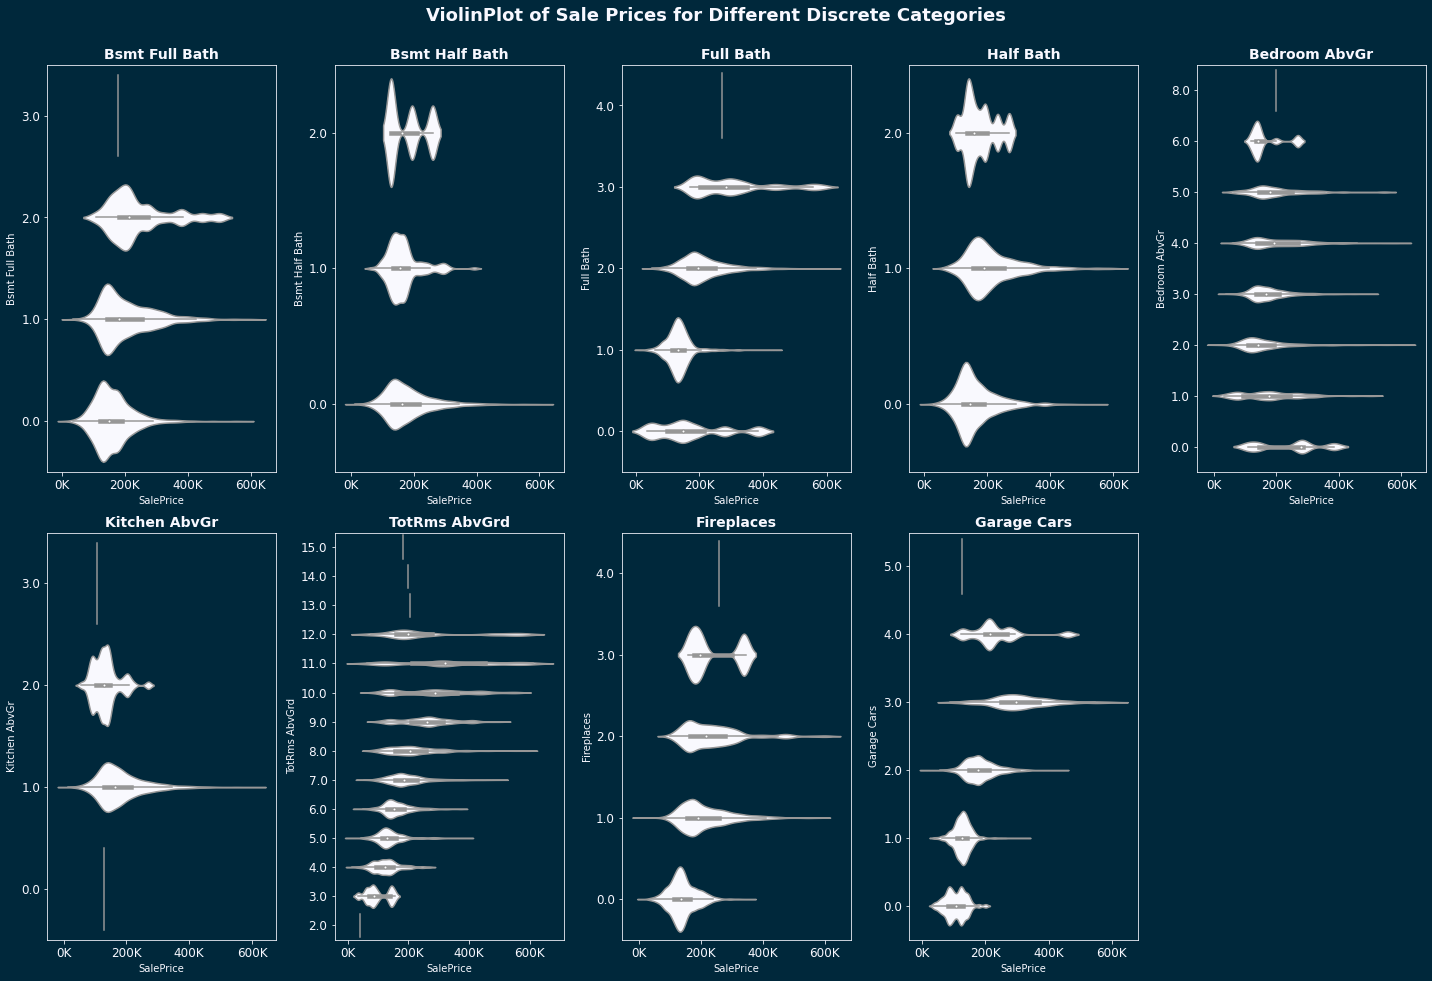

In [23]:
### Code to generate violin
#determining the grid size
len_df_discrete = len(df[dict_categories['discrete']].columns)
ncols = 5
nrows = math.ceil(len_df_discrete/ncols)
#len_df_numeric, nrows, ncols

fig=plt.figure(figsize=(20,20), constrained_layout=False)
fig.suptitle('ViolinPlot of Sale Prices for Different Discrete Categories')
ls_df = []
set_num = 1
subplot_i = 0
for i in range(0,len(dict_categories['discrete'])):
    #skip plotting timeseries data. 
    if  dict_categories['discrete'][i] not in ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']:
        ax=fig.add_subplot(nrows,ncols,subplot_i+1)
        ls_df.append(df[dict_categories['discrete'][i]])
        ls_df.append(df[dict_categories['continuous'][-1:]])
        df_plot = pd.concat(ls_df, axis=1)
        violinplot(ax, df_plot)
        subplot_i += 1
    ls_df =[]
    set_num += 1
    df_plot = []
format_fig(fig)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
fig.savefig('../imgs/ViolinPlot_of_SalePrices_for_Different_Discrete_Categories.png', bbox_inches='tight', dpi=dpi)

#### Timeseries data plotted with Median Sale Price

In [24]:
import matplotlib.category as mcat
#source for xaxis formatting. searbon was internally converting year to numeric even though it is a string. workaround
def pointplot_timeseries(ax, df):
    df.iloc[:,0] = df.iloc[:,0].astype(int)
    sort_index = df.iloc[:,0].sort_values(ascending=True).index.tolist()
    df = df.iloc[sort_index]
    df.iloc[:,0] = df.iloc[:,0].astype(str)
    sns.pointplot(data=df, x=df.iloc[:,0].astype(str), y=df.iloc[:,1], ax=ax, dodge=False, 
                  estimator = np.median, color='ghostwhite', capsize=.2)
    sns.countplot(data=df, x=df.iloc[:,0].astype(str), ax=ax.twinx(), dodge=False, 
                  color='ghostwhite', alpha=.3)
    ax.set_title(df.iloc[:,0].name)
    ax.yaxis.get_label().set_visible(False)
    ax.xaxis.get_label().set_visible(False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 90)
    #ax.set_xticks(df.iloc[:,0].unique())
    units = mcat.UnitData(df.iloc[:,0].unique())
    ax.xaxis.set_units(units)
    ax.xaxis.set_major_locator(mcat.StrCategoryLocator(units._mapping))
    ax.xaxis.set_major_formatter(mcat.StrCategoryFormatter(units._mapping))
    ax.margins(x=0.01)

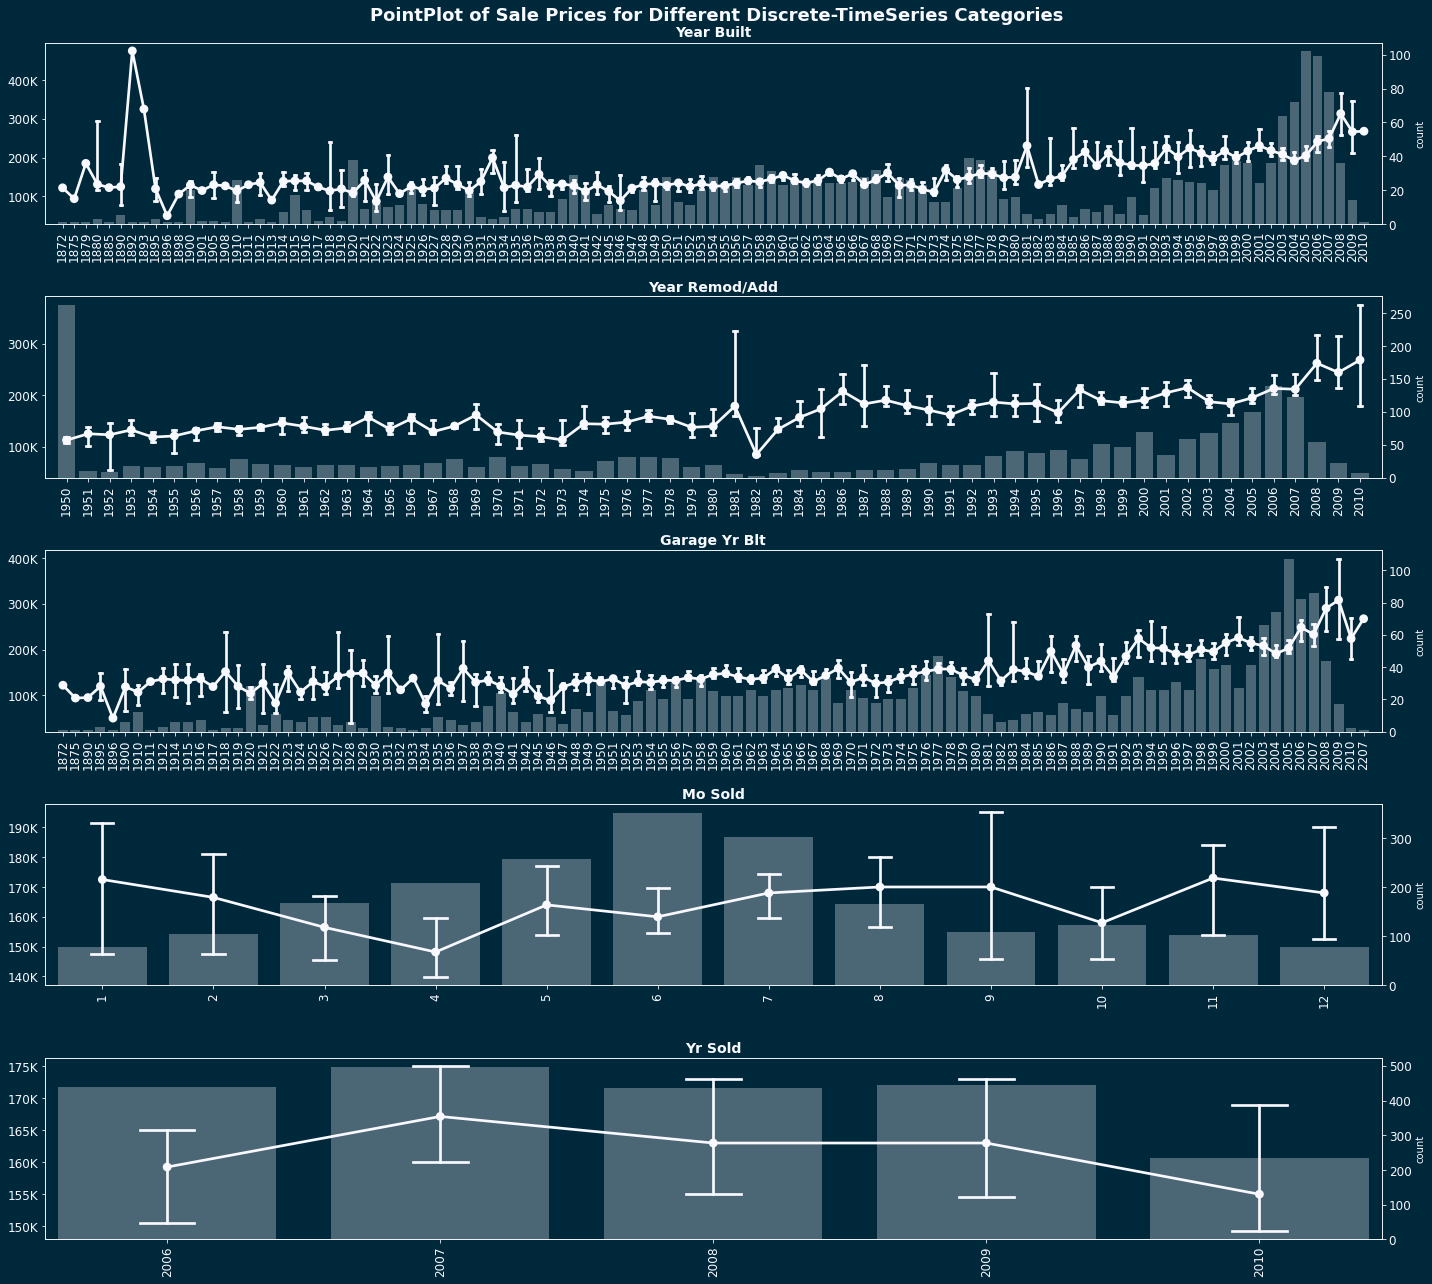

In [25]:
len_df_discrete = len(df[dict_categories['discrete']].columns)
ncols = 1
nrows = math.ceil(len_df_discrete/ncols)
#len_df_numeric, nrows, ncols

fig=plt.figure(figsize=(20,50), constrained_layout=False)
fig.suptitle('PointPlot of Sale Prices for Different Discrete-TimeSeries Categories')
ls_df = []
set_num = 1
subplot_i = 0
for i in range(0,len(dict_categories['discrete'])):
    #skip plotting timeseries data. 
    if  dict_categories['discrete'][i] in ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']:
        ax=fig.add_subplot(nrows,ncols,subplot_i+1)
        ls_df.append(df[dict_categories['discrete'][i]])
        ls_df.append(df[dict_categories['continuous'][-1:]])
        df_plot = pd.concat(ls_df, axis=1)
        pointplot_timeseries(ax, df_plot)
        subplot_i += 1
    ls_df =[]
    set_num += 1
    df_plot = []
format_fig(fig, 'TimeSeries')
plt.tight_layout()
plt.subplots_adjust(top=0.97,hspace = 0.4)
fig.savefig('../imgs/PointPlot_of_SalePrices_for_Different_Discrete_TimeSeries_Categories.png', bbox_inches='tight', dpi=dpi)

## Recap of Data Visualization Notebook

The relationship between the predictors and response variables is investigated with a comprehensive suite of data visualizations. Their purpose and descriptions is provided below.

**Original vs Clean Datasets**

Understanding the distribution of continuous variables and distribution of unique categories in each feature for object type variables for the before and after cleaning the train.csv dataset
*Original Dataset*
Distribution of Numeric Columns in Original Dataset
Unique Value Counts of Object Type Columns with Original Dataset
*Clean Dataset*
Distribution of Numeric Columns in Cleaned Dataset
Unique Value Counts of Object Type Columns with Cleaned Dataset
*Train vs Test datasets*
These visualizations were used to investigate whether the distribution of variables between train and test were consistent, identify any outliers between the datasets which may not get adequately modeled with the training dataset
Comparing Distribution of Numeric Columns Between Train and Test Dataset

**Investigating the Correlation Matrix, Distribution and relationship nature between Continuous Variables**

These visualizations were used to check of linearity of the relationship between predictor and response variable, distribution of variables, multicollinearity between predictors
- Pairplot Scatter HeatMap-5 sets
- Correlation Matrix SalePrice Continuous Categories

**Investigating the trends between Nominal variables and Sale Price**

Each nominal variable has multiple categories associated with it. These visualizations were used to how strongly correlated all categories for a particular feature to the sale price. Box plots helped to identify the spread of the variable as well as spot any outliers. Pointplot of median home price help establish the trend that may be present for the categories
- Box Plot of SalePrices for Different Nominal Categories
- PointPlot of SalePrices for Different Nominal Categories

**Investigating the trends between Ordinal variables and Sale Price**

Along the same lines as nominal variables, a similar analysis was carried out for ordinal variables
- Box Plot of SalePrices for Different Ordinal Categories
- PointPlot of SalePrices for Different Ordinal Categories

**Investigating the trends between Time Series variables and Sale Price**

These plots show the sale price is correlated to the different time category variables present in the datasets
- PointPlot of SalePrices for Different Discrete TimeSeries Categories

**Investigating the trends between Discrete variables and Sale Price**

These plots pertain to the discrete categories of variables such as number of rooms, number of fireplaces, number of cars in the garage, etc. A violin plot was used as it helps to visualize both the distribution as well as the spread of the variables with sale price
- ViolinPlot of SalePrices for Different Discrete Categories